# "Worth It" Wines
#### Christopher Yue and Vishal Hundal

# Table of Contents
1. Introduction
2. Data Cleansing
3. Exploratory Data Analysis
4. Conclusion

# 1. Introduction

The majority of us have been on a budget at one point in our lives (I still am), and let's face it: it's hard to live frugally and have a good time. Sometimes you just want to kick your feet up and relax with a nice, crisp glass of Chardonnay, but all you have are some Solo cups and a box of Franzia.    
In an attempt to put an end to this nationwide crisis, we are going for the top 25 wine brands that offer the best quality wine for the lowest prices. Using a dataset of 150,930 wine reviews from Kaggle (taken from Winemag.com), we will first analyze the relationship between the price of a wine and the score it received in a review. Then we will take a look at the 
# NOT FINISHED

# 2. Data Cleansing

In [67]:
from scipy import stats
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [68]:
table = pd.read_csv('winemag-data_first150k.csv')
table.drop(['Unnamed: 0'], axis=1, inplace=True)
table = table[['country', 'variety', 'description', 'province', 'region_1', 'region_2', 'winery', 
               'designation', 'price', 'points']]
table = table.dropna()
table

,country,variety,description,province,region_1,region_2,winery,designation,price,points
0,US,Cabernet Sauvignon,This tremendous 100% varietal wine hails from ...,California,Napa Valley,Napa,Heitz,Martha's Vineyard,235.0,96
2,US,Sauvignon Blanc,Mac Watson honors the memory of a wine once ma...,California,Knights Valley,Sonoma,Macauley,Special Selected Late Harvest,90.0,96
3,US,Pinot Noir,"This spent 20 months in 30% new French oak, an...",Oregon,Willamette Valley,Willamette Valley,Ponzi,Reserve,65.0,96
8,US,Pinot Noir,This re-named vineyard was formerly bottled as...,Oregon,Chehalem Mountains,Willamette Valley,Bergström,Silice,65.0,95
9,US,Pinot Noir,The producer sources from two blocks of the vi...,California,Sonoma Coast,Sonoma,Blue Farm,Gap's Crown Vineyard,60.0,95
11,US,Pinot Noir,"From 18-year-old vines, this supple well-balan...",Oregon,Ribbon Ridge,Willamette Valley,Patricia Green Cellars,Estate Vineyard Wadensvil Block,48.0,95
12,US,Pinot Noir,A standout even in this terrific lineup of 201...,Oregon,Dundee Hills,Willamette Valley,Patricia Green Cellars,Weber Vineyard,48.0,95
14,US,Pinot Noir,"With its sophisticated mix of mineral, acid an...",Oregon,Dundee Hills,Willamette Valley,Domaine Serene,Grace Vineyard,185.0,95
15,US,Chardonnay,"First made in 2006, this succulent luscious Ch...",Oregon,Willamette Valley,Willamette Valley,Bergström,Sigrid,90.0,95
16,US,Cabernet Sauvignon,"This blockbuster, powerhouse of a wine suggest...",California,Diamond Mountain District,Napa,Hall,Rainin Vineyard,325.0,95


# 3. Exploratory Data Analysis

In [69]:
table.describe()

,price,points
count,39241.000000,39241.000000
mean,37.546316,88.359981
std,26.716547,3.438542
min,4.000000,80.000000
25%,22.000000,86.000000
50%,32.000000,88.000000
75%,45.000000,91.000000
max,2013.000000,100.000000


In [70]:
def check_for_dups(df):
    seen = set()
    dups = set()
    num_dups = 0
    for index, row in df.iterrows():
        if row['description'] not in seen:
            seen.add(row['description'])
        else:
            dups.add(row['description'])
            num_dups += 1
            
    return dups, num_dups

Duplicate entries can really mess with data analysis, especially if there are a lot of a specific entry. For example, if we were to try to get the mean wine price from this dataset while the data included 1000 duplicate reviews of a $1,000 wine, the calculated mean would be much higher than it actually is.
To see if duplicates are an issue, I want to check specifically the description column for duplicate entries, because two wines could coincidentally have other features that perfectly match (e.g. region, price, points). The description, however, must be unique to a review.

In [71]:
dups, num_dups = check_for_dups(table)
dups

{'Has an old-fashioned, rustic quality, an acidic, bone-dry wine with sour cherry and dark unsweetened chocolate flavors that finish with some bitterness. Brings to mind those old-style Chiantis.',
 "This dry, spicy wine shows the rustic, rugged quality that often accompanies Dry Creek Cabs. It has the briary texture of a Zinfandel, but with Cabernet's classic blackberry and black currant profile. Drink now–2012.",
 'Beautiful Zin, lush and decadent and heady. Hits you with the most wonderfully ripe chocolate, blackberry and cherry marmalade, licorice and spice flavors that are so rich, they would be gooey without the balancing acids and tannins. Drink this wine with the richest possible fare, like short ribs of beef.',
 "A blend of Sauvignon Blanc, Riesling and Pinot Gris. It's crisp and clean in acidity, with zesty flavors of pineapples, oranges, mangoes and vanilla. If only it were drier, the score would be much higher.",
 'Soft and charming, with jammy cherry, blackberry and chocol

There seem to be a lot of duplicate descriptions. Let's take a look at exactly how many of those reviews were duplicates.

In [72]:
print('Number of duplicates: {}'.format(num_dups))
print('Percentage duplicates: {}%'.format(num_dups * 100 / len(table)))

Number of duplicates: 13819
Percentage duplicates: 35.21571825386713%


In [73]:
table.drop_duplicates('description', inplace=True)

In [100]:
dups, num_dups = check_for_dups(table)
print('Number of duplicates: {}'.format(num_dups))

Number of duplicates: 0


As you can see, approximately 35% of our original data consisted of duplicates. That's a lot of duplicates!
We took care of this issue by simply dropping all of the rows that contain duplicate descriptions from our data. After running the code above, we are now duplicate-free.

In [75]:
table

,country,variety,description,province,region_1,region_2,winery,designation,price,points
0,US,Cabernet Sauvignon,This tremendous 100% varietal wine hails from ...,California,Napa Valley,Napa,Heitz,Martha's Vineyard,235.0,96
2,US,Sauvignon Blanc,Mac Watson honors the memory of a wine once ma...,California,Knights Valley,Sonoma,Macauley,Special Selected Late Harvest,90.0,96
3,US,Pinot Noir,"This spent 20 months in 30% new French oak, an...",Oregon,Willamette Valley,Willamette Valley,Ponzi,Reserve,65.0,96
8,US,Pinot Noir,This re-named vineyard was formerly bottled as...,Oregon,Chehalem Mountains,Willamette Valley,Bergström,Silice,65.0,95
9,US,Pinot Noir,The producer sources from two blocks of the vi...,California,Sonoma Coast,Sonoma,Blue Farm,Gap's Crown Vineyard,60.0,95
11,US,Pinot Noir,"From 18-year-old vines, this supple well-balan...",Oregon,Ribbon Ridge,Willamette Valley,Patricia Green Cellars,Estate Vineyard Wadensvil Block,48.0,95
12,US,Pinot Noir,A standout even in this terrific lineup of 201...,Oregon,Dundee Hills,Willamette Valley,Patricia Green Cellars,Weber Vineyard,48.0,95
14,US,Pinot Noir,"With its sophisticated mix of mineral, acid an...",Oregon,Dundee Hills,Willamette Valley,Domaine Serene,Grace Vineyard,185.0,95
15,US,Chardonnay,"First made in 2006, this succulent luscious Ch...",Oregon,Willamette Valley,Willamette Valley,Bergström,Sigrid,90.0,95
16,US,Cabernet Sauvignon,"This blockbuster, powerhouse of a wine suggest...",California,Diamond Mountain District,Napa,Hall,Rainin Vineyard,325.0,95


Taking another look at our data, I am highly suspicious of there being a correlation between the price of a wine and the number of points it receives. We can plot a graph of these two variables to get an idea of their relationship.

In [95]:
# sns.scatterplot(x=table['price'], y=table['points'])

It looks like there are some outliers that are distorting the graph. We can remove them and then plot the graph again.

In [96]:
# table = table[np.abs(table['points'] - table['points'].mean()) <= (3*table['points'].std())]
# table = table[np.abs(table['price'] - table['price'].mean()) <= (3*table['price'].std())]

In [97]:
# sns.scatterplot(x=table['price'], y=table['points'])
# sns.regplot(x=table['price'], y=table['points'], line_kws={'color': 'orange'})

It looks like there is a rough linear relationship between the price of a wine and the number of points it receives from a review.
We can see how correlated these two continuous variables are by finding the Pearson Correlation Coefficient between them.

In [98]:
# stats.pearsonr(x=table['price'], y=table['points'])[0]

A Pearson Correlation Coefficient value of 0.488 means that there is a moderate positive relationship between the price and points of a wine (a value of 1 would represent a positive relationship and a value of -1 would represent a negative relationship). We can see how much the number of points increases on average for every dollar added to the price.

In [99]:
# res = sm.OLS(table['price'], table['points']).fit()
# print(res.summary())

The linear regression followed the formula y = mx + b. With m being "coef" in the OLS Regression Results, the number of points a wine receives increases by 0.4133 per every dollar, on average.

In [32]:
# features = table.loc[:, 'country':'points']
# label = table['variety']

# INCLUDE HYPOTHESIS TEST HERE
#     NULL HYPOTHESIS: THERE IS A CORRELATION BETWEEN THE PRICE OF A WINE AND THE POINTS IT RECEIVES
#     ALTERNATIVE HYPOTHESIS: THERE IS NO CORRELATION
### THERE ACTUALLY IS A MODERATE CORRELATION, AS I FOUND IT IN THE OTHER JUPYTER NOTEBOOK. HOWEVER, BECAUSE THE PEARSON CORRELATION COEFFICIENT ONLY HAS A VALUE OF .48 SOMETHING, IT MEANS THAT NOT *THAT* MUCH OF THE DATA FITS WELL LINEARLY. OUR GOAL IS TO FIND THOSE WINES/DATA -- THE ONES THAT HAVE HIGH POINTS BUT LOW PRICES.

In [76]:
stats.pearsonr(x=table['price'], y=table['points'])

(0.42119760051930549, 0.0)

Now, let's determine how we should actually measure how "worth it" a wine is. We could simply say that the worth it-ness of a wine is measured by the number of points the wine received divided by the price of the wine (price/points). This way, the lower the price and the higher the points, the more worth it a wine is. We can add this quantity as a feature column for our current dataset by calculating this number for each observation. I'm going to call this number the "worth score."

In [77]:
worth_score = (table['points'] / table['price'])
worth_score = (worth_score - worth_score.mean()) / worth_score.std()
worth_score = pd.DataFrame({'worth_score': worth_score})
table = pd.concat([table, worth_score], axis=1)

table = table[['country', 'variety', 'description', 'province', 'region_1', 'region_2', 'winery', 'designation', 
               'price', 'points', 'worth_score']]
table.head()

,country,variety,description,province,region_1,region_2,winery,designation,price,points,worth_score
0,US,Cabernet Sauvignon,This tremendous 100% varietal wine hails from ...,California,Napa Valley,Napa,Heitz,Martha's Vineyard,235.0,96,-1.521169
2,US,Sauvignon Blanc,Mac Watson honors the memory of a wine once ma...,California,Knights Valley,Sonoma,Macauley,Special Selected Late Harvest,90.0,96,-1.157899
3,US,Pinot Noir,"This spent 20 months in 30% new French oak, an...",Oregon,Willamette Valley,Willamette Valley,Ponzi,Reserve,65.0,96,-0.931458
8,US,Pinot Noir,This re-named vineyard was formerly bottled as...,Oregon,Chehalem Mountains,Willamette Valley,Bergström,Silice,65.0,95,-0.939949
9,US,Pinot Noir,The producer sources from two blocks of the vi...,California,Sonoma Coast,Sonoma,Blue Farm,Gap's Crown Vineyard,60.0,95,-0.872725


In [78]:
print('Lowest worth score: {}'.format(table['worth_score'].min()))
print('Highest worth score: {}'.format(table['worth_score'].max()))

Lowest worth score: -1.7216949588695694
Highest worth score: 9.706331459613148


Now I want to get a sense of the different varieties of wine. Since our end goal is to somehow find where to find the best wines for the lowest prices, wine varieties could potentially be a good place to look for such "deals."

In [79]:
wineries = table['winery'].unique()
for winery in wineries:
    print('Wineries:' + str(winery))

Wineries:Heitz
Wineries:Macauley
Wineries:Ponzi
Wineries:Bergström
Wineries:Blue Farm
Wineries:Patricia Green Cellars
Wineries:Domaine Serene
Wineries:Hall
Wineries:Gary Farrell
Wineries:Center of Effort
Wineries:Comartin
Wineries:Roar
Wineries:Saviah
Wineries:Zepaltas
Wineries:Buty
Wineries:Brandlin
Wineries:DeLille
Wineries:Dr. Konstantin Frank
Wineries:Efeste
Wineries:Jason-Stephens
Wineries:Michael Mondavi Family Estate
Wineries:Panther Creek
Wineries:Provenance Vineyards
Wineries:Raymond
Wineries:Archery Summit
Wineries:B Cellars
Wineries:Bethel Heights
Wineries:Eleven Eleven
Wineries:Franciscan
Wineries:Parducci
Wineries:Hestan
Wineries:Ehret
Wineries:EOS
Wineries:Martinez & Martinez
Wineries:Kuleto Estate
Wineries:Charles Krug
Wineries:Millbrook
Wineries:MacPhail
Wineries:Foursight
Wineries:Goat Bubbles
Wineries:Grgich Hills
Wineries:Navarro
Wineries:Renwood
Wineries:Trinchero
Wineries:Andis
Wineries:Beaucanon
Wineries:Brecon Estate
Wineries:Peachy Canyon
Wineries:Three
Wineries

Wineries:Topanga
Wineries:DC Flynt MW Selections
Wineries:Quackenbush
Wineries:D'Anbino
Wineries:Rotta
Wineries:Campus Oaks
Wineries:Municipal Winemakers
Wineries:Pomar Junction
Wineries:Murphy's Law
Wineries:Odisea
Wineries:Silver Lake
Wineries:Prime
Wineries:Astrale e Terra
Wineries:Corliss Estates
Wineries:Reverie
Wineries:Yates Family Vineyard
Wineries:Pamplin
Wineries:Betz Family
Wineries:Stevens
Wineries:Basel Cellars
Wineries:The Crusher
Wineries:Trio Vintners
Wineries:Mosby
Wineries:Paul Hobbs
Wineries:Brogan
Wineries:JR Wine
Wineries:Hourglass
Wineries:Balboa
Wineries:Windstream
Wineries:Knights Bridge
Wineries:Lamborn Family Vineyards
Wineries:Terra d'Oro
Wineries:Reid Family Vineyards
Wineries:Castillo De Feliciana
Wineries:Skipstone
Wineries:Waits-Mast
Wineries:Spellbound
Wineries:Terlato
Wineries:Mark Ryan
Wineries:Nobility
Wineries:Signorello
Wineries:North by Northwest
Wineries:Atmosphere
Wineries:Costa de Oro
Wineries:Petito
Wineries:Nine Hats
Wineries:Brandborg
Winerie

Wineries:Icaria
Wineries:Edmonds Winery
Wineries:Tamás
Wineries:Shibumi Knoll
Wineries:Vin Perdu
Wineries:In Re
Wineries:Turning Leaf
Wineries:Dancing Bear Cellars
Wineries:D'Argenzio
Wineries:Ruston
Wineries:Carneros Creek
Wineries:Aubichon Cellars
Wineries:Thornton
Wineries:Don Ernesto
Wineries:Anthill
Wineries:Serdonis
Wineries:Ronan
Wineries:Sunfire
Wineries:Hartwell
Wineries:Briar Rose
Wineries:Laura Zahtila
Wineries:Stacked Stone
Wineries:Les Caves Roties de Pente
Wineries:Napa Redwoods Estate
Wineries:Bouké
Wineries:Cefalu'
Wineries:Ulises Valdez
Wineries:Thomas Halby
Wineries:Eno
Wineries:Andrew Rich
Wineries:Lenné Estate
Wineries:Forlorn Hope
Wineries:Jalama
Wineries:Godwin
Wineries:Carte Blanche
Wineries:Casa Piena
Wineries:Miles
Wineries:Bucklin
Wineries:Kori
Wineries:Mendielle Vertu
Wineries:Nobos
Wineries:Couvillion Winery
Wineries:Niagara Landing
Wineries:Fralich
Wineries:Nine x Nine
Wineries:Powers
Wineries:M2
Wineries:Passalacqua
Wineries:George IV
Wineries:Night Owl
Wi

In [80]:
print('Number of wineries: {}'.format(len(wineries)))

Number of wineries: 3395


There are 3,395 different wineries in the data. This is quite a large number and may be difficult to perform analysis on, so maybe we should only keep the wineries with the top 25 worth it scores in the data.
Since we're going to be looking at the mean worth it score, we should also first discard any varieties that have too few observations. If one of those varieties were to have a very high or very low worth it score, for example, it may be because the observations of those varieties just so happened to contain such an exreme score.

In [81]:
def get_top_25():
    mean_worth_scores = []

    for winery in wineries:
        mean_worth_score = table['worth_score'].loc[table['winery'] == winery].mean()
        mean_worth_scores.append(mean_worth_score)

    winery_mean_worth_scores = pd.DataFrame({'winery': wineries, 'mean_worth_score': mean_worth_scores})
    winery_mean_worth_scores.sort_values('mean_worth_score', ascending=False, inplace=True)
    return winery_mean_worth_scores.head(25)
top_25 = get_top_25()
top_25

,winery,mean_worth_score
401,Pam's Cuties,9.706331
3359,Bocce,5.980664
2699,Riverside,5.888672
1503,Barefoot Cellars,5.815079
3023,Round Hill,5.390383
2924,Barefoot,4.916187
2785,Cook's,4.876762
3104,Bully Hill,4.876762
2023,CK Mondavi,4.845425
3335,Hacienda,4.797912


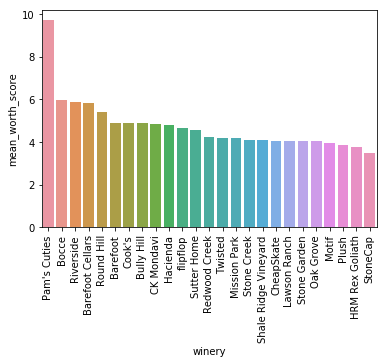

In [82]:
var_worth_plot = sns.barplot(x=top_25['winery'], y=top_25['mean_worth_score'])
for label in var_worth_plot.get_xticklabels():
    label.set_rotation(90)

I'm a bit suspicious of the Pam's Cuties winery having that much higher of a mean worth it score than the second highest holder. Perhaps we can see how many times Pam's Cuties shows up in the data to see if this high mean worth score was purely due to chance.

In [83]:
print('Number of occurences: {}'.format(table['winery'].loc[table['winery'] == 'Pam\'s Cuties'].count()))

Number of occurences: 1


As I suspected, Pam's Cuties only appears in the dataset 1 time. This is a sign that we should probably filter out wineries that have less than a certain number of occurrences in the data. We can get an idea of what this number should be by finding the trimmed mean number of times any winery appears in the data.

In [84]:
winery_counts = table['winery'].value_counts()
winery_counts

Williams Selyem              195
Testarossa                   162
Columbia Crest               149
Kendall-Jackson              124
Chateau Ste. Michelle        110
Gary Farrell                  95
Concannon                     89
De Loach                      88
Cameron Hughes                84
Iron Horse                    84
Morgan                        80
Robert Mondavi                73
Dutton-Goldfield              69
Peachy Canyon                 69
Dry Creek Vineyard            67
J. Lohr                       67
Adelaida                      67
Rosenblum                     66
Marimar Estate                66
Sineann                       62
Thomas Fogarty                61
Martin Ray                    61
Joseph Swan Vineyards         61
Calera                        61
Rodney Strong                 61
Raymond                       61
Foxen                         60
Kenwood                       60
Beringer                      58
Midnight                      56
          

In [85]:
print('Mean number of winery occurences: {}'.format(winery_counts.mean()))

Mean number of winery occurences: 7.488070692194404


I think this mean is a good indicator of where we should set the minimum number of times a winery should appear in the dataset. I'm going to mostly-qualitatively set this value to 10. We can now remove any wineries that appear less than 10 times throughout the data.

In [86]:
wineries_kept = set()
for winery in winery_counts.index:
    if winery_counts[winery] >= 10:
        wineries_kept.add(winery)
wineries_kept

{'14 Hands',
 ':Nota Bene',
 'Abacela',
 'Acacia',
 'Acorn',
 'Adams Bench',
 'Adelaida',
 'Adelsheim',
 'Airfield Estates',
 'Alexander Valley Vineyards',
 'Alexandria Nicole',
 'Alloro',
 'Alma Rosa',
 'Amador Foothill Winery',
 'Amalie Robert',
 'Ampelos',
 'Anaba',
 'Anam Cara',
 'Andis',
 'Andrew Murray',
 'Andrew Will',
 'Angel Vine',
 'Anthony Nappa',
 'Anthony Road',
 'Apolloni',
 'Arbor Brook',
 'Arbor Crest',
 'Arcadian',
 'Archery Summit',
 'Argyle',
 'Arista',
 'Armanino Family Cellars',
 'Armida',
 'Arrow Creek',
 'Arrowood',
 'Artesa',
 'Atwater',
 'Au Bon Climat',
 'Ayoub',
 'B Cellars',
 'B.R. Cohn',
 'BOND',
 'Babcock',
 'Baer',
 'Baileyana',
 'Balboa',
 'Baldacci',
 'Ballentine',
 'Balletto',
 'Barefoot Bubbly',
 'Bargetto',
 'Barnard Griffin',
 'Barnett',
 'Barrister',
 'Basel Cellars',
 'Beaulieu Vineyard',
 'Beauregard',
 'Belhurst',
 'Bell',
 'Bella',
 'Bellangelo',
 'Belle Glos',
 'Benessere',
 'Bennett Lane',
 'Benovia',
 'Benziger',
 'Bergevin Lane',
 'Bergströ

In [87]:
table = table.loc[table['winery'].isin(wineries_kept)]

In [88]:
print('Number of Wineries Left: {}'.format(len(wineries_kept)))

Number of Wineries Left: 768


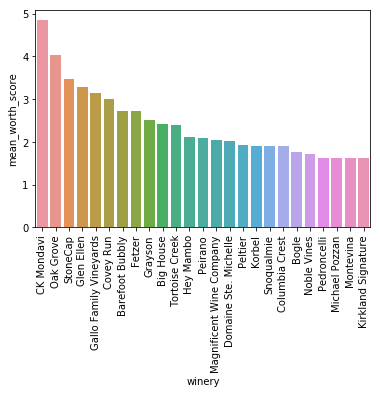

In [89]:
top_25 = get_top_25()

var_worth_plot = sns.barplot(x=top_25['winery'], y=top_25['mean_worth_score'])
for label in var_worth_plot.get_xticklabels():
    label.set_rotation(90)

In [90]:
# varieties_enough = set()
# for variety in varieties_counts.index:
#     if varieties_counts[variety] >= 100:
#         varieties_enough.add(variety)
# print(type(table['variety']))
# table = table.loc[table['variety'].isin(varieties_enough)]
# table.reset_index(inplace=True)
# table.drop(columns=['index'], inplace=True)
# table

In [91]:
# table['variety'].value_counts().plot(kind='bar', rot=0)
# plt.xticks(rotation=90)

In [92]:
# varieties = {}

To train our model, we are going to have to convert all of our categorical features (i.e. text) into continuous features (i.e. numbers). This is a very common process that is performed for training Machine Learning models, as features are often categorical in datasets. Machine Learning algorithms work purely with numbers to perform various tasks such as regression (e.g. predicting housing prices when given the square footage and location of a house) and classification (e.g. predicting whether or not a tumor is malignant, given the mass of the tumor). We will convert all of the categorical features except for the description feature, which we will touch on this in a bit.

In [93]:
# to_discretize = ['country', 'province', 'region_1', 'region_2', 'winery', 'designation', 'variety']

# for col_name in to_discretize:
#     table[col_name] = table[col_name].astype('category')

In [94]:
# cat_columns = table.select_dtypes(['category']).columns
# table[cat_columns] = table[cat_columns].apply(lambda x: x.cat.codes)
# table.head()